In [2]:
import numpy as np
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
%config InlineBackend.figure_format = 'retina'
%matplotlib inline



In [3]:
data = pd.read_csv('/Users/tlee010/desktop/dsi-sf-2-timdavidlee/datasets/affairs/affair.csv')
data.head()
data.drop(['Unnamed: 0'], axis=1, inplace = True)

In [4]:

data.rename(columns = {
        'ym':'years_married'
        , 'child':'has_children'
        , 'religious':'religion_id'
        , 'education':'years_of_ed'
        , 'occupation':'occupation_prestige'
        , 'rate':'happiness_score'
        , 'nbaffairs':'affairs_ct' 
    },inplace = True)
data.head(10)

,sex,age,years_married,has_children,religion_id,years_of_ed,occupation_prestige,happiness_score,affairs_ct
0,male,37.0,10.00,no,3,18,7,4,0
1,female,27.0,4.00,no,4,14,6,4,0
2,female,32.0,15.00,yes,1,12,1,4,0
3,male,57.0,15.00,yes,5,18,6,5,0
4,male,22.0,0.75,no,2,17,6,3,0
5,female,32.0,1.50,no,2,17,5,5,0
6,female,22.0,0.75,no,2,12,1,3,0
7,male,57.0,15.00,yes,2,14,4,4,0
8,female,32.0,15.00,yes,4,16,1,2,0
9,male,22.0,1.50,no,4,14,4,5,0


/Users/tlee010/anaconda/envs/dsi/lib/python2.7/site-packages/seaborn/categorical.py:2125: UserWarning: The boxplot API has been changed. Attempting to adjust your arguments for the new API (which might not work). Please update your code. See the version 0.6 release notes for more info.
  warnings.warn(msg, UserWarning)


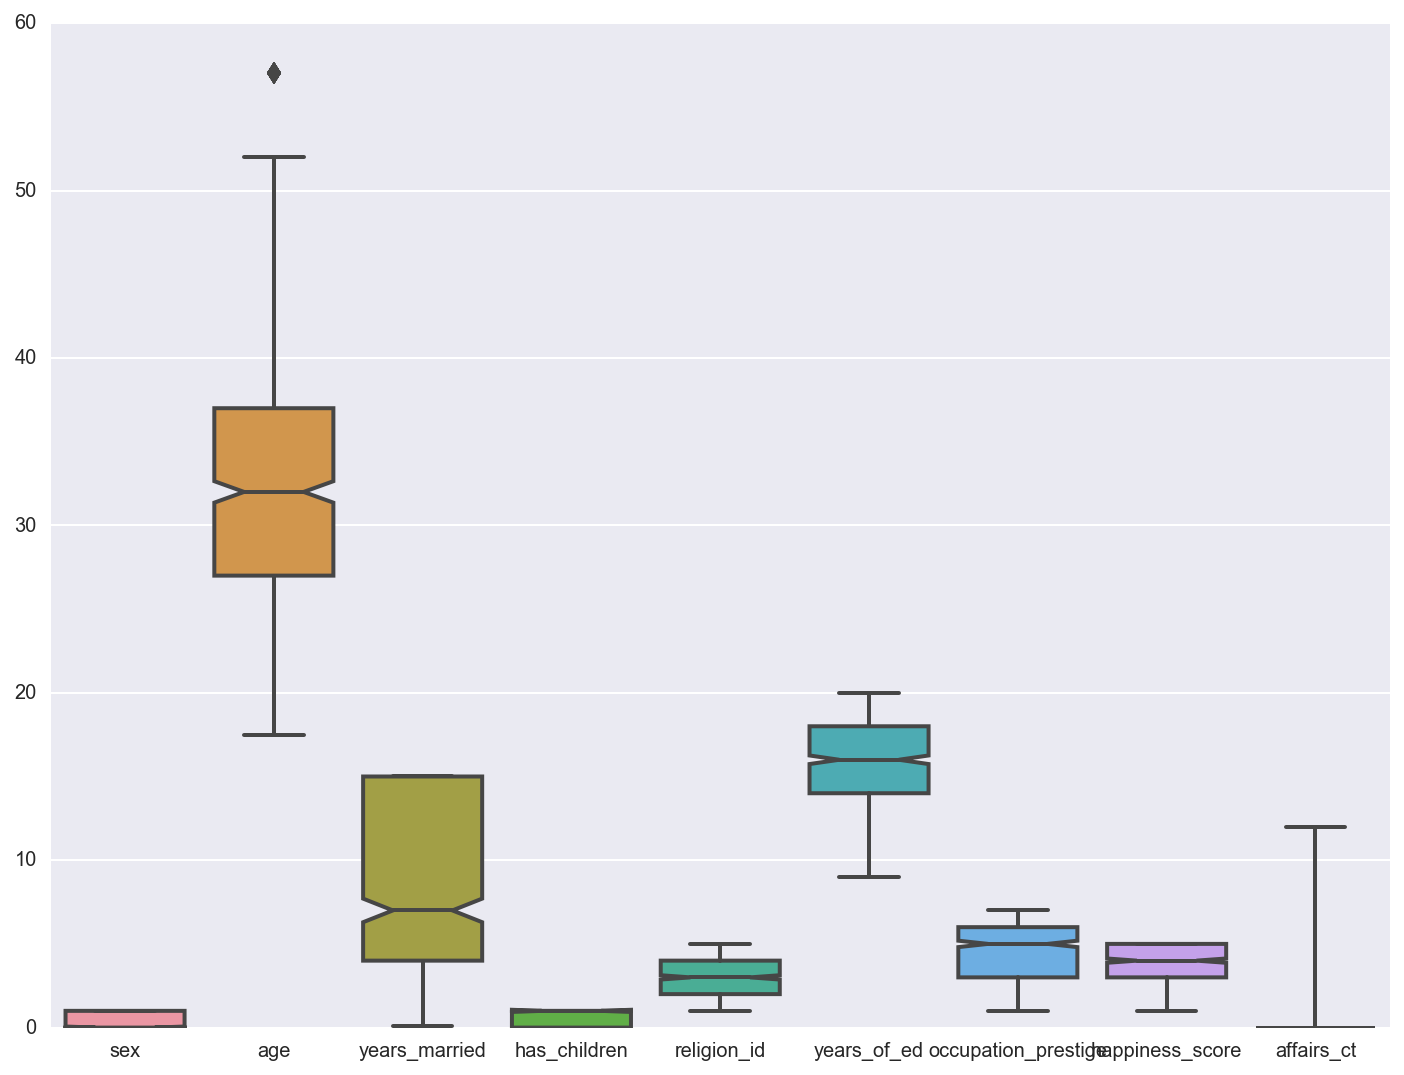

In [5]:
data['has_children'].replace({'yes':1, 'no':0},inplace=True)
data['sex'].replace({'male':1, 'female':0},inplace=True)
fig = plt.figure(figsize=[12,9])
ax = fig.gca()
ax = sns.boxplot(data, orient='v',fliersize = 8, linewidth = 2, notch = True, ax=ax)
plt.show()

In [24]:
subset = data[[x for x in data.columns if x not in ('sex','has_children')]]
normed = (subset - subset.mean())/subset.std()

normed2 = pd.concat([normed,data[['sex','has_children']]], axis = 1)
print normed2.head(3)

        age  years_married  religion_id  years_of_ed  occupation_prestige  \
0  0.485800       0.327088    -0.099762     0.763192             1.541859   
1 -0.590770      -0.749860     0.756763    -0.901702             0.992240   
2 -0.052485       1.224544    -1.812810    -1.734150            -1.755854   

   happiness_score  affairs_ct  sex  has_children  
0         0.061839    -0.44135    1             0  
1         0.061839    -0.44135    0             0  
2         0.061839    -0.44135    0             1  


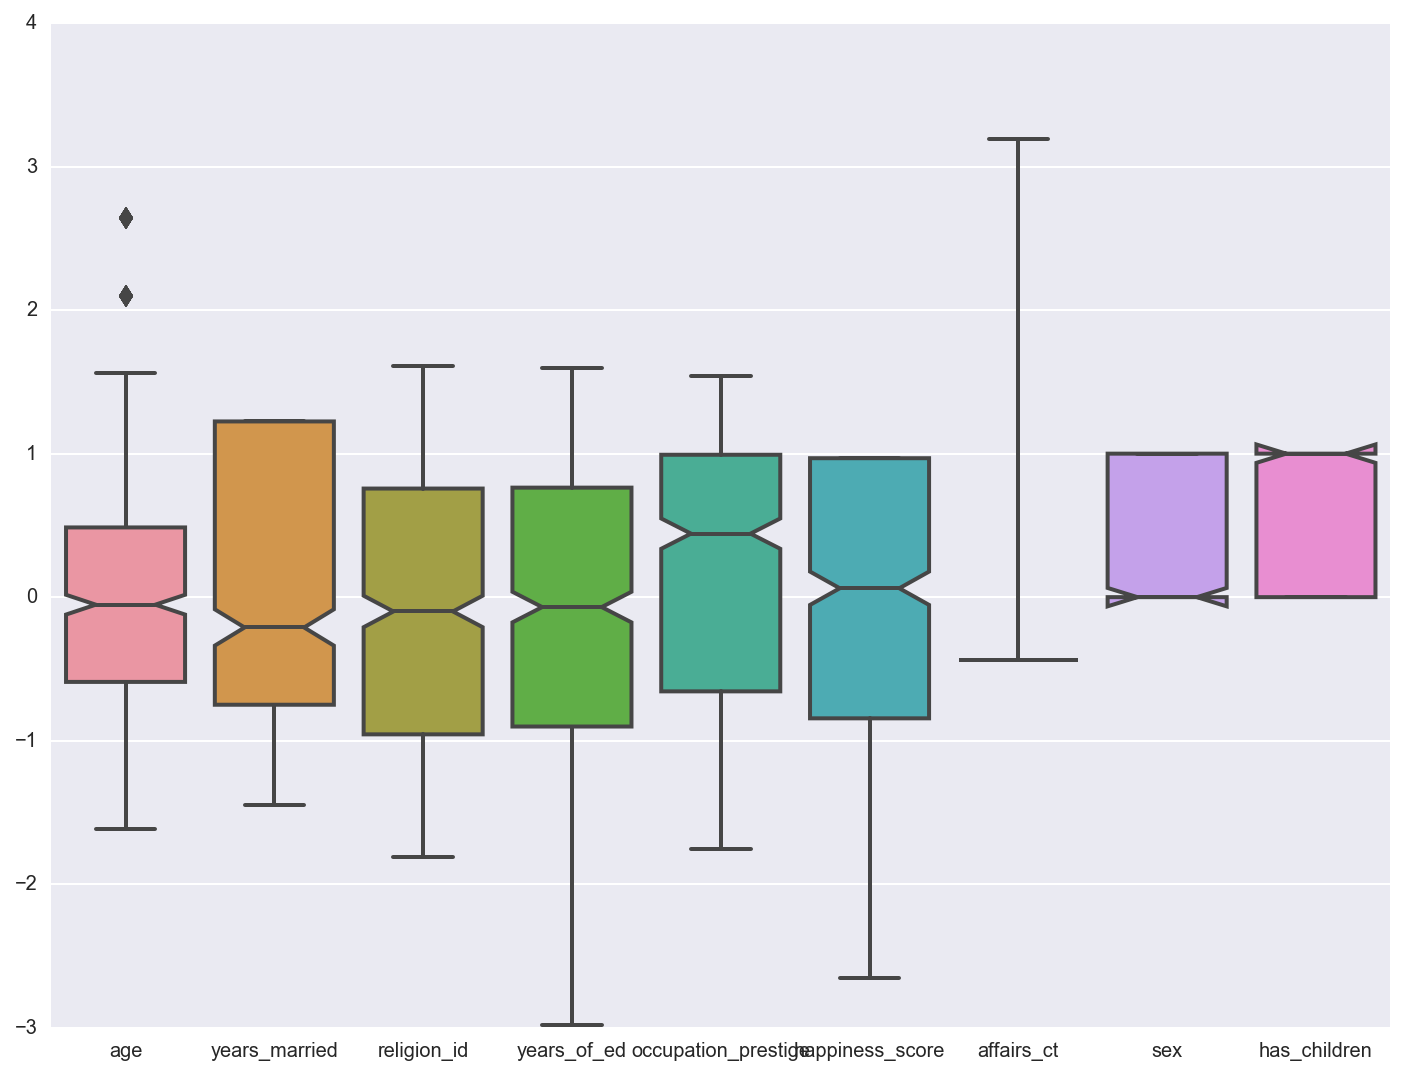

In [7]:
fig = plt.figure(figsize=[12,9])
ax = fig.gca()
ax = sns.boxplot(normed2, orient='v',fliersize = 8, linewidth = 2, notch = True, ax=ax)
plt.show()



In [8]:
normed2[normed2['sex']==0].corr()['happiness_score']

age                   -0.254029
years_married         -0.310141
religion_id           -0.012099
years_of_ed            0.169804
occupation_prestige    0.060825
happiness_score        1.000000
affairs_ct            -0.280012
sex                         NaN
has_children          -0.274268
Name: happiness_score, dtype: float64

In [9]:
normed2[normed2['sex']==0].corr()['affairs_ct']

age                    0.108877
years_married          0.189595
religion_id           -0.145231
years_of_ed           -0.068921
occupation_prestige    0.041054
happiness_score       -0.280012
affairs_ct             1.000000
sex                         NaN
has_children           0.118980
Name: affairs_ct, dtype: float64

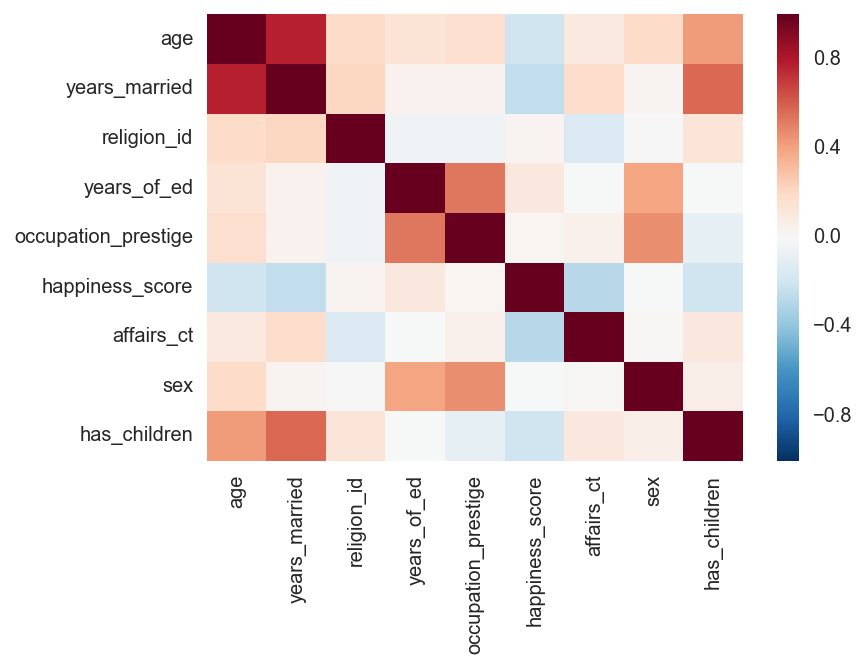

In [25]:
sns.heatmap(normed2.corr())

34.2435897436
32.0


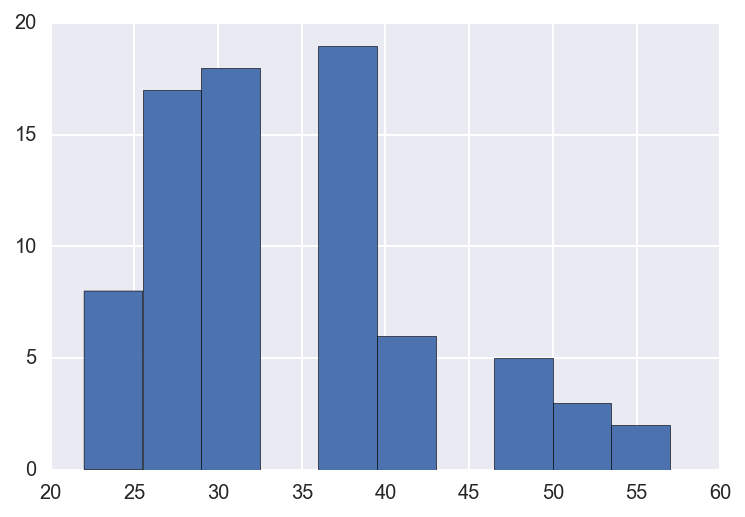

In [20]:
print data['age'][(data['affairs_ct'] > 0) & (data['sex']==1)].mean()
print data['age'][(data['affairs_ct'] > 0) & (data['sex']==1)].median()
data['age'][(data['affairs_ct'] > 0) & (data['sex']==1)].hist()




32.5069444444
32.0


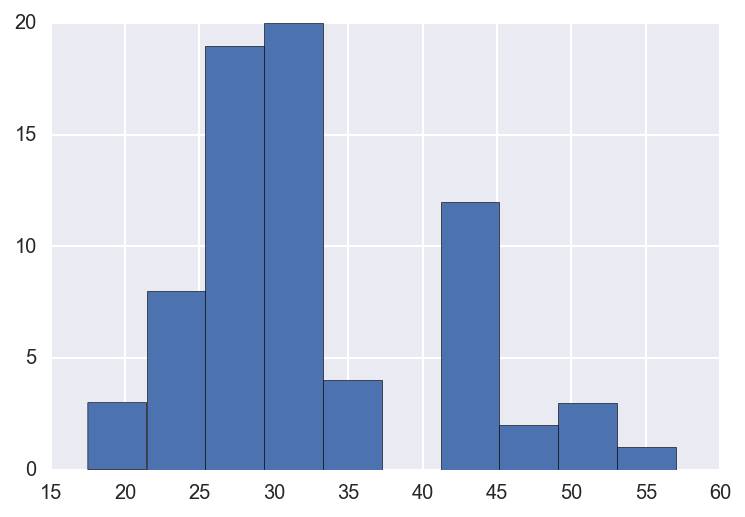

In [22]:
print data['age'][(data['affairs_ct'] > 0) & (data['sex']==0)].mean()
print data['age'][(data['affairs_ct'] > 0) & (data['sex']==0)].median()
data['age'][(data['affairs_ct'] > 0) & (data['sex']==0)].hist()